# 1. Importing the libraries and loading the data

In [1]:
import pandas as pd
import numpy as np

# Load the data
combined_df = pd.read_csv('dataset/Combined-Preprocessed-Dataset.csv')

# Convert the string representation of lists into actual lists of numbers
X = combined_df['extracted_features'].str.replace('\n', '').str.strip('[]').str.split().apply(
    lambda x: [float(i) for i in x])

# Convert lists of numbers into numpy arrays
X = np.array(X.tolist())

# Get the labels as a numpy array
y = np.array(combined_df['label'].tolist())

X, y

(array([[-5.11931144e-02,  1.16266675e-01,  2.12036110e-02, ...,
         -5.63658886e-02, -3.32730711e-02,  5.68893878e-03],
        [-6.35785013e-02,  7.72023574e-02,  1.69519372e-02, ...,
         -9.07599479e-02, -1.45020848e-02, -2.63511632e-02],
        [-4.60926928e-02,  1.01213977e-01,  2.46110968e-02, ...,
         -4.41155061e-02,  6.20419669e-05, -3.49129736e-02],
        ...,
        [-7.53861666e-02,  8.98229852e-02,  2.71067135e-02, ...,
         -9.96468365e-02, -6.26214370e-02,  1.13755856e-02],
        [-7.61107877e-02,  8.66875350e-02,  1.53271351e-02, ...,
         -5.03607690e-02, -5.49129630e-03, -7.77193252e-03],
        [-8.64653289e-02,  6.55829459e-02,  2.51406208e-02, ...,
         -3.54760848e-02, -3.68417650e-02, -2.72565763e-02]]),
 array([1, 1, 1, ..., 0, 0, 0]))

# 2. Visualize the groups of data

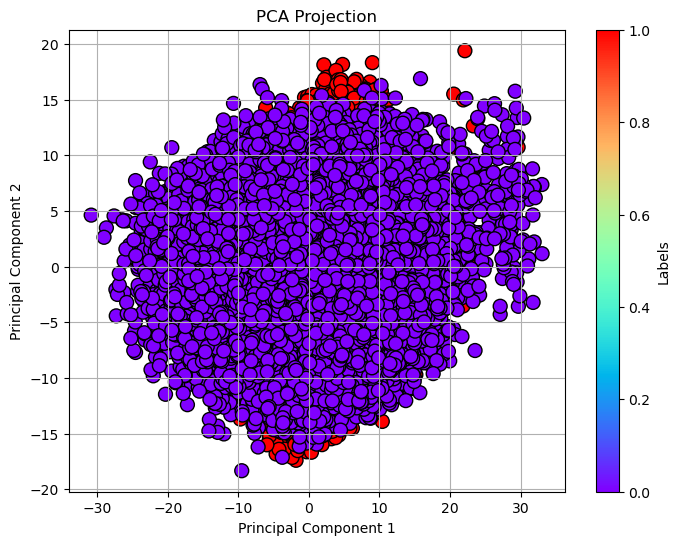

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

import matplotlib.pyplot as plt

# Visualizing the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', edgecolor='k', s=100)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar().set_label('Labels')
plt.grid(True)
plt.show()